Author : Anirudh Sathish 
Roll No : CS20B1125 
Question 4 

Task : 

In [12]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
import json 

Read the data 

In [13]:
df_iris = pd.read_csv("Iris.csv")
print(df_iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Splitting into the training and testing 

The testing consists of flowers with id  1 , 51 and 101 . Rest everything will come under training 

In [14]:
labels = [0,50,100]
df_train = df_iris.drop(labels = labels , axis = 0 )
df_test = df_iris.iloc[labels]

For the question we have been asked to consider only PetalLength and PetalWidth , So let us keep this and drop the rest from the test and the train 

In [15]:
df_train = df_train.iloc[:,[0,3,4,5]]
print(df_train)

      Id  PetalLengthCm  PetalWidthCm         Species
1      2            1.4           0.2     Iris-setosa
2      3            1.3           0.2     Iris-setosa
3      4            1.5           0.2     Iris-setosa
4      5            1.4           0.2     Iris-setosa
5      6            1.7           0.4     Iris-setosa
..   ...            ...           ...             ...
145  146            5.2           2.3  Iris-virginica
146  147            5.0           1.9  Iris-virginica
147  148            5.2           2.0  Iris-virginica
148  149            5.4           2.3  Iris-virginica
149  150            5.1           1.8  Iris-virginica

[147 rows x 4 columns]


Doing the same for the test_set 

In [16]:
df_test = df_test.iloc[:,[0,3,4,5]]
print(df_test)

      Id  PetalLengthCm  PetalWidthCm          Species
0      1            1.4           0.2      Iris-setosa
50    51            4.7           1.4  Iris-versicolor
100  101            6.0           2.5   Iris-virginica


Plotting the data , considering Petal Width along Y axis and Petal Length along X axis 

Creating a label class to represent classes in terms of numbers 

In [17]:
flower_classes = set(df_train["Species"])
iris_classes = list(flower_classes)
print(iris_classes)

# Applying the same indexing to train 
df_train['Species'] = df_train['Species'].apply(iris_classes.index)

['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']


In [18]:
print(df_train)

      Id  PetalLengthCm  PetalWidthCm  Species
1      2            1.4           0.2        2
2      3            1.3           0.2        2
3      4            1.5           0.2        2
4      5            1.4           0.2        2
5      6            1.7           0.4        2
..   ...            ...           ...      ...
145  146            5.2           2.3        1
146  147            5.0           1.9        1
147  148            5.2           2.0        1
148  149            5.4           2.3        1
149  150            5.1           1.8        1

[147 rows x 4 columns]


{'Iris-versicolor': 'red', 'Iris-virginica': 'yellow', 'Iris-setosa': 'blue'}


Text(0.5, 1.0, 'Iris flower classes ')

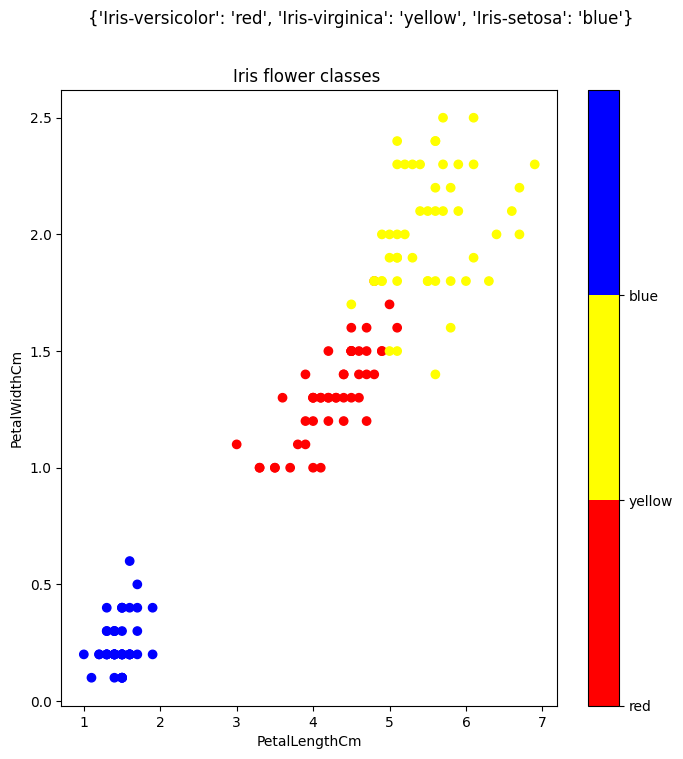

In [19]:
# Colors for the classes 
colors = ['red','yellow','blue']
fig = plt.figure(figsize=(8,8))
x = df_train.iloc[:,[1]]
y = df_train.iloc[:,[2]]
labels = df_train["Species"] 
plt.scatter(x,y, c = labels ,  cmap=matplotlib.colors.ListedColormap(colors))


# Adding the color bar 
cb = plt.colorbar()
loc = np.arange(0,max(labels),max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

# Color mapping 
color_mapping = {}
for i in range(len(iris_classes)):
    color_mapping[iris_classes[i]] = colors[i]
print(color_mapping)

title = str(color_mapping)

plt.xlabel(df_train.columns[1])
plt.ylabel(df_train.columns[2])
plt.suptitle(title)
plt.title('Iris flower classes ')

Euclidean distance is capable of capturing the required classification 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Taking n = 3 , distance as euclidean -> which is nothing but
#  minwoski distance with p = 2 
knn = KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')

In [23]:
print(df_test)

      Id  PetalLengthCm  PetalWidthCm          Species
0      1            1.4           0.2      Iris-setosa
50    51            4.7           1.4  Iris-versicolor
100  101            6.0           2.5   Iris-virginica


In [25]:
knn.fit(df_train.iloc[:,[1,2]],df_train["Species"])
predictions = knn.predict(df_test.iloc[:,[1,2]])
df_test["predicted"] = np.array(predictions)

In [32]:
print(df_test.iloc[0][1],df_test.iloc[0][2])
print(df_test)

1.4 0.2
      Id  PetalLengthCm  PetalWidthCm          Species  predicted
0      1            1.4           0.2      Iris-setosa          2
50    51            4.7           1.4  Iris-versicolor          0
100  101            6.0           2.5   Iris-virginica          1


Let us plot the values out 

{'Iris-versicolor': 'red', 'Iris-virginica': 'yellow', 'Iris-setosa': 'blue'}


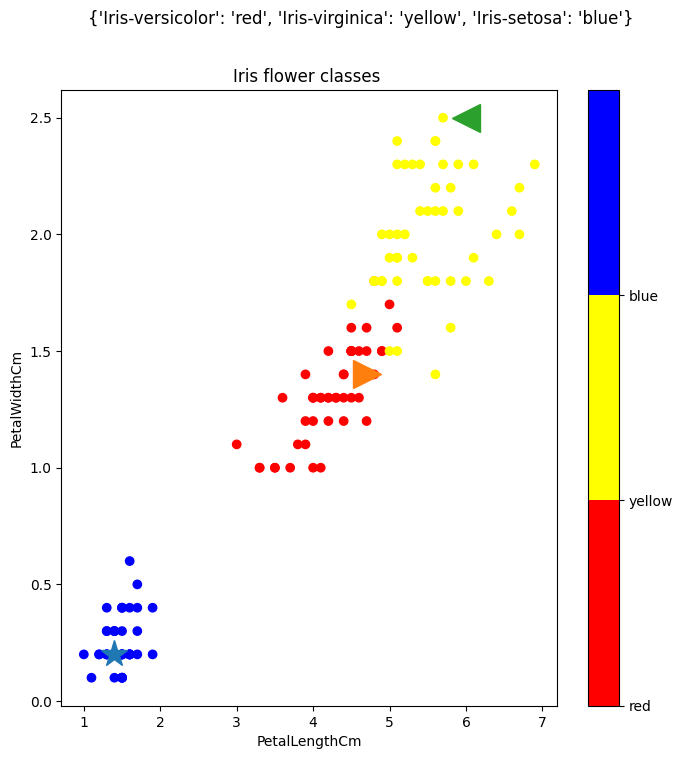

In [34]:
colors = ['red','yellow','blue']
fig = plt.figure(figsize=(8,8))
x = df_train.iloc[:,[1]]
y = df_train.iloc[:,[2]]
labels = df_train["Species"] 
plt.scatter(x,y, c = labels ,  cmap=matplotlib.colors.ListedColormap(colors))


# Adding the color bar 
cb = plt.colorbar()
loc = np.arange(0,max(labels),max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

# Color mapping 
color_mapping = {}
for i in range(len(iris_classes)):
    color_mapping[iris_classes[i]] = colors[i]
print(color_mapping)

title = str(color_mapping)

plt.xlabel(df_train.columns[1])
plt.ylabel(df_train.columns[2])
plt.suptitle(title)
plt.title('Iris flower classes ')

# Adding the new points 

# Flower with id 0
plt.plot([df_test.iloc[0][1]],[df_test.iloc[0][2]], marker='*', ls='none', ms=20)

# Flower with id 50
plt.plot([df_test.iloc[1][1]],[df_test.iloc[1][2]], marker='>', ls='none', ms=20)

# Flower with id 100
plt.plot([df_test.iloc[2][1]],[df_test.iloc[2][2]], marker='<', ls='none', ms=20)

